<a href="https://colab.research.google.com/github/Saipushpanjali/Weather/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile, os

# Unzip into a folder called "weather_data"
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("weather_data")

# Check what files are inside
os.listdir("weather_data")


['weather_data.csv']

In [3]:
# ---------------------------
# Step 1: Load and Inspect Data
# ---------------------------
import pandas as pd
import numpy as np

# Load CSV (adjust path if needed)
df = pd.read_csv("weather_data/weather_data.csv")

print("Shape:", df.shape)   # rows and columns
print("Columns:", df.columns)
print(df.head())            # preview first rows

# ---------------------------
# Step 2: Data Cleaning
# ---------------------------
# Fill missing values
df['Temperature_C'] = df['Temperature_C'].fillna(df['Temperature_C'].mean())
df['Humidity_pct'] = df['Humidity_pct'].fillna(df['Humidity_pct'].mean())
df['Precipitation_mm'] = df['Precipitation_mm'].fillna(0)

# Convert Date column
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

print("\nMissing values after cleaning:\n", df.isnull().sum())

# ---------------------------
# Step 3: Descriptive Statistics
# ---------------------------
print("\nDescriptive Statistics:")
print("Mean Temperature:", np.mean(df['Temperature_C']))
print("Median Temperature:", np.median(df['Temperature_C']))
print("Std Dev Temperature:", np.std(df['Temperature_C']))

print("Mean Humidity:", np.mean(df['Humidity_pct']))
print("Median Humidity:", np.median(df['Humidity_pct']))
print("Std Dev Humidity:", np.std(df['Humidity_pct']))

print("Mean Precipitation:", np.mean(df['Precipitation_mm']))
print("Median Precipitation:", np.median(df['Precipitation_mm']))
print("Std Dev Precipitation:", np.std(df['Precipitation_mm']))

# ---------------------------
# Step 4: Monthly and Seasonal Analysis
# ---------------------------
# Extract month and define season
df['Month'] = df['Date_Time'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Monthly averages
monthly_avg = df.groupby('Month')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm']].mean()
print("\n📅 Monthly Average Values:")
print(monthly_avg)

# Seasonal averages
seasonal_avg = df.groupby('Season')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm']].mean()
print("\n🍂 Seasonal Average Values:")
print(seasonal_avg)


Shape: (1000000, 6)
Columns: Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')
       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  

Missing values after cleaning:
 Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

Descriptive Stat

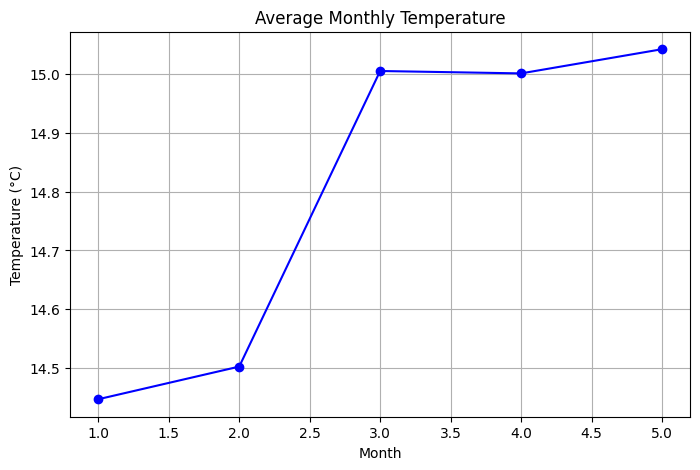

In [4]:
import matplotlib.pyplot as plt

# Group by Month and calculate average temperature
monthly_temp = df.groupby("Month")["Temperature_C"].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_temp.index, monthly_temp.values, marker="o", linestyle="-", color="b")
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


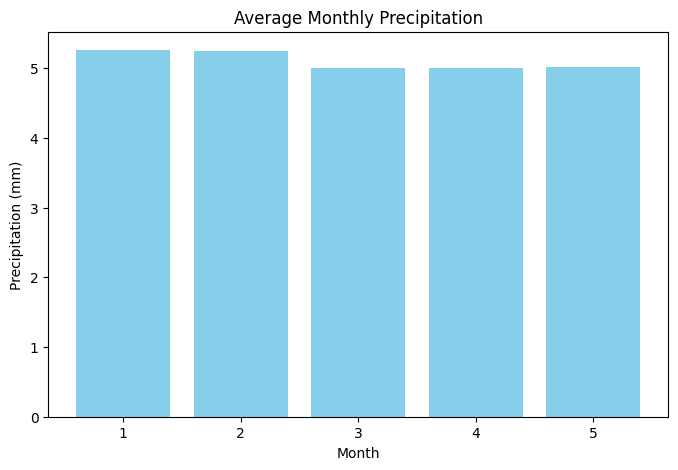

In [5]:
# Group by Month and calculate average precipitation
monthly_precip = df.groupby("Month")["Precipitation_mm"].mean()

plt.figure(figsize=(8,5))
plt.bar(monthly_precip.index, monthly_precip.values, color="skyblue")
plt.title("Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.show()


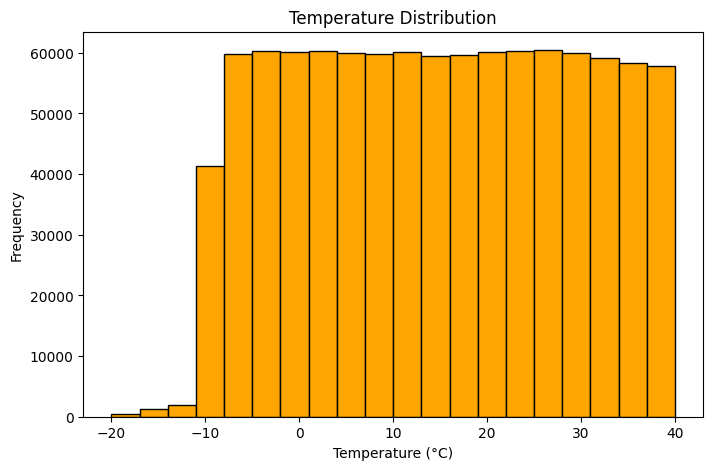

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df["Temperature_C"], bins=20, color="orange", edgecolor="black")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


In [7]:
import numpy as np

# Define thresholds
high_temp_thresh = np.percentile(df["Temperature_C"], 90)   # top 10% hottest
low_temp_thresh = np.percentile(df["Temperature_C"], 10)    # bottom 10% coldest
high_precip_thresh = np.percentile(df["Precipitation_mm"], 90)  # top 10% wettest

# Filter extreme weather
extreme_hot = df[df["Temperature_C"] > high_temp_thresh]
extreme_cold = df[df["Temperature_C"] < low_temp_thresh]
extreme_rain = df[df["Precipitation_mm"] > high_precip_thresh]

print("Extreme Hot Days:", extreme_hot.shape[0])
print("Extreme Cold Days:", extreme_cold.shape[0])
print("Extreme Rainy Days:", extreme_rain.shape[0])

# Show a few examples
extreme_hot.head()


Extreme Hot Days: 100000
Extreme Cold Days: 100000
Extreme Rainy Days: 100000


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Season
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,4,Spring
10,New York,2024-03-04 13:47:15,35.145559,54.752866,8.349195,25.430310,3,Spring
13,Houston,2024-05-09 00:53:10,38.641269,85.952726,0.470782,20.779264,5,Spring
14,Houston,2024-05-12 15:57:55,39.666772,72.747026,1.263722,6.479492,5,Spring
18,San Antonio,2024-05-08 16:20:53,35.179548,35.083071,9.597294,4.507863,5,Spring
